In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

path = '/content/drive/My Drive/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import numpy as np

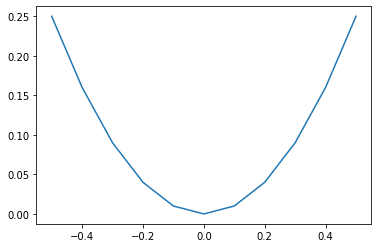

In [5]:
def calculate(x):
  return x*x

inputs = [-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5]
outputs = [calculate(x) for x in inputs]

plt.plot(inputs, outputs)
plt.show()

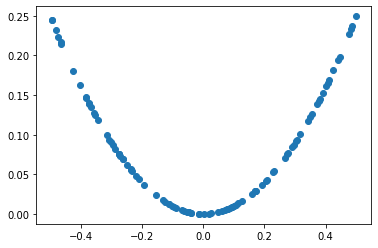

In [6]:
def generate_samples(n = 100):
  X1 = np.random.rand(n) - 0.5
  X2 = X1 * X1
  X1 = X1.reshape(n,1)
  X2 = X2.reshape(n,1)

  return np.hstack((X1,X2))

data = generate_samples()

plt.scatter(data[:,0], data[:,1])
plt.show()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 25)                75        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 26        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


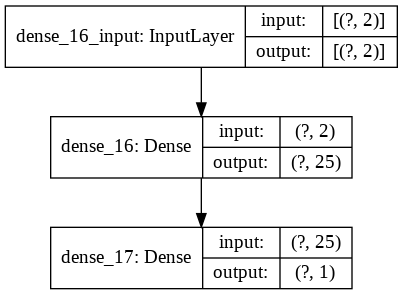

In [19]:
def define_discriminator(n_inputs = 2):
  model = Sequential()
  model.add(Dense(25, activation= 'relu', kernel_initializer = 'he_uniform', input_dim = n_inputs))
  model.add(Dense(1,activation = 'sigmoid'))

  model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return model

model = define_discriminator()

model.summary()

plot_model(model, to_file=path+'discriminator_plot.png', show_shapes=True, show_layer_names=True)


In [44]:
def generate_real_samples(n):
  X1 = np.random.rand(n) - 0.5
  X2 = X1 * X1
  X1 = X1.reshape(n,1)
  X2 = X2.reshape(n,1)
  X = np.hstack((X1,X2))
  y = np.ones((n,1))

  return X,y

def generate_fake_samples(n):
  X1 = np.random.rand(n)*2 - 1  # in range [-1,1]
  X2 = np.random.rand(n)*2 - 1
  X1 = X1.reshape(n,1)
  X2 = X2.reshape(n,1)
  X = np.hstack((X1,X2))
  y = np.zeros((n,1))

  return X,y

In [9]:
def train_discriminator(model, n_epochs = 1000, n_batch = 128):
  half_batch = int(n_batch/2)

  for i in range(n_epochs):
    #generate real samples
    X_real, y_real = generate_real_samples(half_batch)
    #update model
    model.train_on_batch(X_real, y_real)
    #generate fake samples
    X_fake, y_fake = generate_fake_samples(half_batch)
    #update model
    model.train_on_batch(X_fake, y_fake)
    #evaluate model
    _, acc_real = model.evaluate(X_real, y_real, verbose = 0)
    _, acc_fake = model.evaluate(X_fake, y_fake, verbose = 0)
    print(f'Epoch {i} : Accuracy_real : {acc_real}, Accuracy_fake: {acc_fake}')

model = define_discriminator()
train_discriminator(model)

Epoch 0 : Accuracy_real : 0.5, Accuracy_fake: 0.65625
Epoch 1 : Accuracy_real : 0.5, Accuracy_fake: 0.625
Epoch 2 : Accuracy_real : 0.546875, Accuracy_fake: 0.59375
Epoch 3 : Accuracy_real : 0.546875, Accuracy_fake: 0.609375
Epoch 4 : Accuracy_real : 0.5625, Accuracy_fake: 0.59375
Epoch 5 : Accuracy_real : 0.5, Accuracy_fake: 0.65625
Epoch 6 : Accuracy_real : 0.515625, Accuracy_fake: 0.609375
Epoch 7 : Accuracy_real : 0.5, Accuracy_fake: 0.765625
Epoch 8 : Accuracy_real : 0.578125, Accuracy_fake: 0.671875
Epoch 9 : Accuracy_real : 0.46875, Accuracy_fake: 0.65625
Epoch 10 : Accuracy_real : 0.546875, Accuracy_fake: 0.578125
Epoch 11 : Accuracy_real : 0.59375, Accuracy_fake: 0.6875
Epoch 12 : Accuracy_real : 0.375, Accuracy_fake: 0.625
Epoch 13 : Accuracy_real : 0.484375, Accuracy_fake: 0.671875
Epoch 14 : Accuracy_real : 0.6875, Accuracy_fake: 0.71875
Epoch 15 : Accuracy_real : 0.515625, Accuracy_fake: 0.765625
Epoch 16 : Accuracy_real : 0.4375, Accuracy_fake: 0.640625
Epoch 17 : Accurac

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 15)                90        
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 32        
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


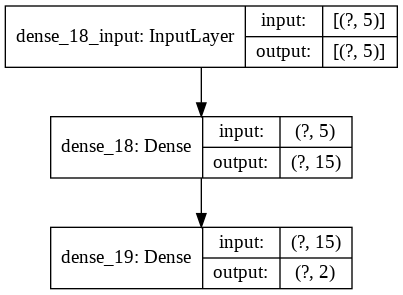

In [21]:
def define_generator(latent_dim, n_outputs = 2):
  model = Sequential()
  model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim = latent_dim))
  model.add(Dense(n_outputs, activation = 'linear'))

  return model

model = define_generator(5)
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file=path+'generator_plot.png', show_shapes=True, show_layer_names=True)

In [22]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
	# generate points in the latent space
	x_input = np.random.randn(latent_dim * n)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n, latent_dim)
	return x_input

def generate_fake_samples(generator, latent_dim, n):
  x_input = generate_latent_points(latent_dim, n)
  X = generator.predict(x_input)
  plt.scatter(X[:,0], X[:,1])
  plt.show()

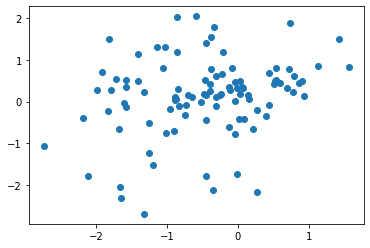

In [23]:
latent_dim = 5
model = define_generator(latent_dim)
generate_fake_samples(model, latent_dim, 100)

In [50]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n)
	# predict outputs
	X = generator.predict(x_input)
	# create class labels
	y = np.zeros((n, 1))
	return X, y

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_26 (Sequential)   (None, 2)                 122       
_________________________________________________________________
sequential_25 (Sequential)   (None, 1)                 101       
Total params: 223
Trainable params: 122
Non-trainable params: 101
_________________________________________________________________


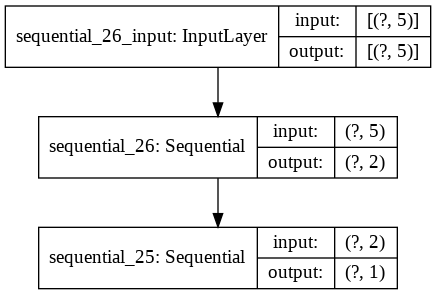

In [51]:
def define_gan(generator, discriminator):
  discriminator.trainable = False
  # connect them
  model = Sequential()
  model.add(generator)
  model.add(discriminator)
  
  model.compile(loss = 'binary_crossentropy', optimizer= 'adam')
  return model

# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# summarize gan model
gan_model.summary()
# plot gan model
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

In [52]:
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
	# prepare real samples
	x_real, y_real = generate_real_samples(n)
	# evaluate discriminator on real examples
	_, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
	# evaluate discriminator on fake examples
	_, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print(f'Epoch {epoch}, Accuracy_real: {acc_real}, Accuracy_fake: {acc_fake}')
	# scatter plot real and fake data points
	plt.scatter(x_real[:, 0], x_real[:, 1], color='red')
	plt.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
	plt.show()

In [55]:
def train(g_model, d_model, gan_model, latent_dim, n_epochs = 20000, n_batch = 128, n_eval = 2000):
  #determine half the size of one batch, for updating the discriminator
  half_batch = int(n_batch/2)

  for i in range(n_epochs):
    x_real, y_real = generate_real_samples(half_batch)
    x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)

    #update discriminator
    d_model.train_on_batch(x_real, y_real)
    d_model.train_on_batch(x_fake, y_fake)

    #prepare points in latent space as input for the generator
    x_gan = generate_latent_points(latent_dim, n_batch)
    #create inverted labels for the fake samples
    y_gan = np.ones((n_batch,1))
    
    #update generator via discriminator's error
    gan_model.train_on_batch(x_gan, y_gan)

    if (i) % n_eval == 0:
      summarize_performance(i, g_model, d_model, latent_dim)

Epoch 0, Accuracy_real: 1.0, Accuracy_fake: 0.0


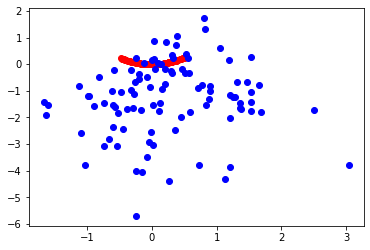

Epoch 2000, Accuracy_real: 0.47999998927116394, Accuracy_fake: 0.9800000190734863


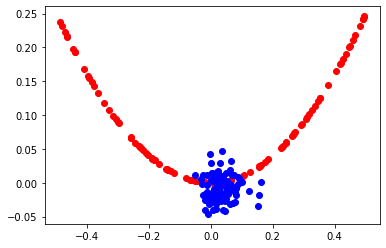

Epoch 4000, Accuracy_real: 0.3499999940395355, Accuracy_fake: 1.0


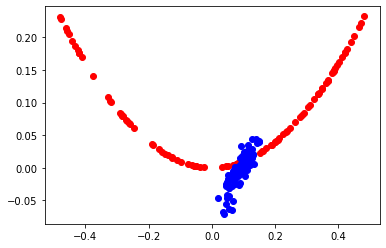

Epoch 6000, Accuracy_real: 0.5899999737739563, Accuracy_fake: 0.8799999952316284


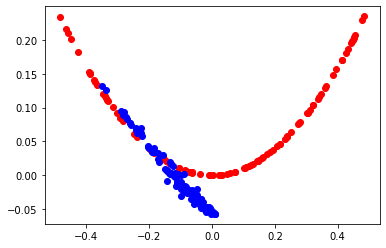

Epoch 8000, Accuracy_real: 0.6899999976158142, Accuracy_fake: 0.09000000357627869


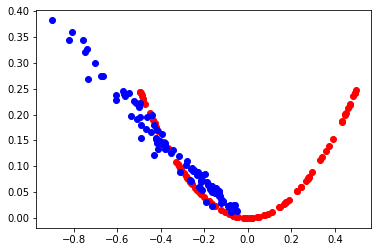

Epoch 10000, Accuracy_real: 0.0, Accuracy_fake: 1.0


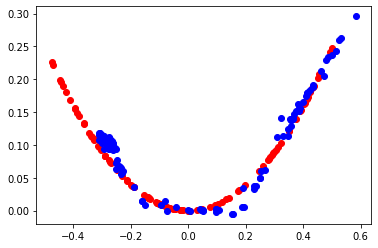

Epoch 12000, Accuracy_real: 0.36000001430511475, Accuracy_fake: 0.7400000095367432


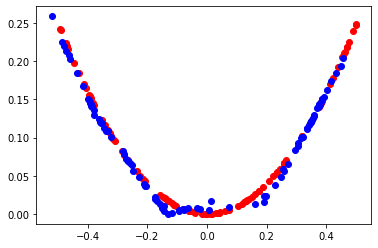

KeyboardInterrupt: ignored

In [57]:
# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)